# <font color=red>Baseline</font> on Boston House Price Data<br/>(Regression Model)

In this program we work on __regression model__ and just create a __baseline__ considering all the features present in the original dataset. Later, we apply various other techniques viz., __Variance Thresholding, Chisquare test, ANOVA, Mutual Information__ to fetch only the __significant features__ from the complete collection; train and test to see if there is any improvement.

<img src='../Preparing Data for Machine Learning/Data/Filter Methods.png' width=500/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
bd = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
bd.rename(columns = {
                     'CRIM':'crime rate',
                     'ZN':'residential land zone',
                     'INDUS':'business acres',
                     'CHAS':'Charles River',
                     'NOX':'nitric oxides',
                     'RM':'number of rooms',
                     'AGE':'age',
                     'DIS':'distances to employment centres',
                     'RAD':'accessibility to highways',
                     'TAX':'property-tax',
                     'PTRATIO':'pupil-teacher ratio',
                     'B':'lower income levels',
                     'LSTAT':'Median Home Value',
                    }, inplace = True)

bd.sample(10)
bd.to_csv('Data/boston.csv', index=False)

In [7]:
boston_df = pd.read_csv('Data/boston.csv')
boston_df.sample(10)

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97
188,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
449,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24.0,666.0,20.2,304.21,19.31


Exploratory Data Analysis

Text(0, 0.5, 'Pupil-teacher ratio by town')

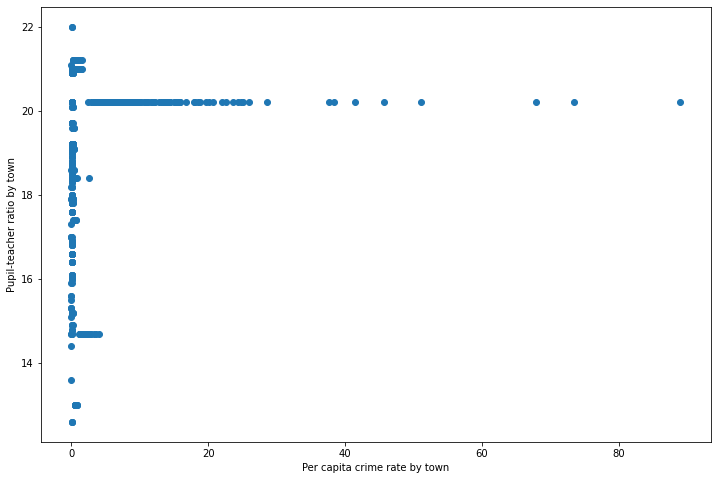

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(boston_df['crime rate'], boston_df['pupil-teacher ratio'])
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Pupil-teacher ratio by town')

Observations:
- Hard to find any remarkable patterns

Text(0, 0.5, 'Distances to employment centres')

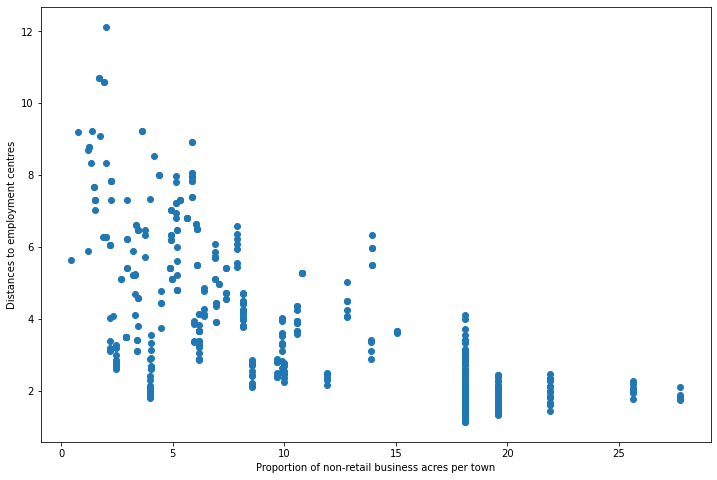

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(boston_df['business acres'], boston_df['distances to employment centres'])
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Distances to employment centres')

Observations:
- More the business centers in a town lower the distances to employment centres

Text(0, 0.5, 'Median Home Value')

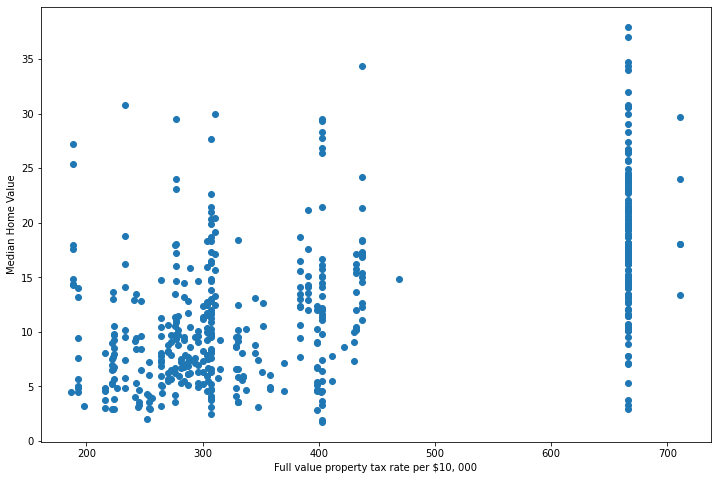

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(boston_df['property-tax'], boston_df['Median Home Value'])
plt.xlabel('Full value property tax rate per $10, 000')
plt.ylabel('Median Home Value')

Observations:
- Higher the property tax, lower the home value

In [11]:
boston_corr = boston_df.corr()
boston_corr

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
crime rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
residential land zone,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
business acres,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
Charles River,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nitric oxides,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
number of rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
distances to employment centres,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
accessibility to highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
property-tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


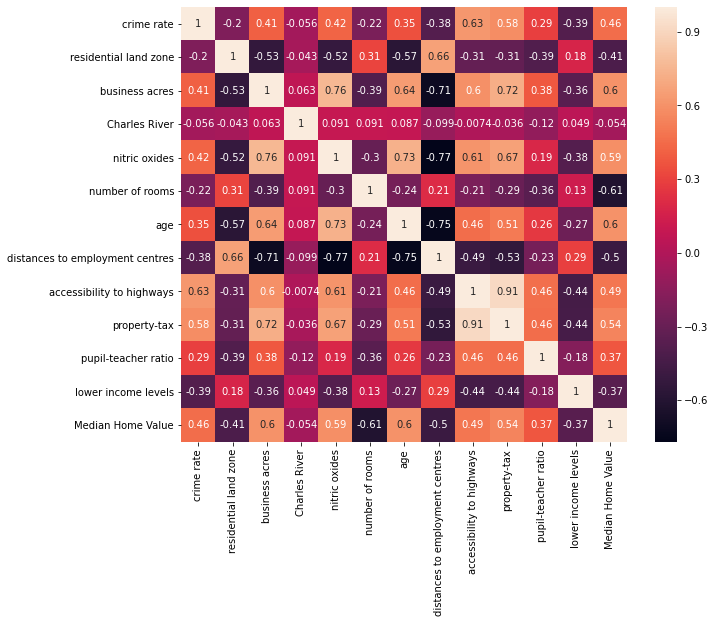

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(boston_corr, annot=True)

Observations:
- Crime Rate and Business Acres are -vely correlated with Median Home Value
- Home Prices are lower when Crime Rate is higher
- Home Prices are lower when majority of town is occupied with Businesses
- No. of rooms is +vely correlated with Home Price
- Distances to employment centers is also +vely correlated with Home Price

In [13]:
from sklearn.model_selection import train_test_split

X = boston_df.drop('Median Home Value', axis=1)
Y = boston_df['Median Home Value']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
x_train.shape, y_train.shape

((404, 12), (404,))

In [15]:
x_test.shape, y_test.shape

((102, 12), (102,))

In [16]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(x_train, y_train)

In [17]:
# Score - rSquared is a measure indicating how much of "variance is captured" by the model
print('Training score : ', reg_model.score(x_train, y_train))

Training score :  0.6606049437345258


In [18]:
predictors = x_train.columns
coef = pd.Series(reg_model.coef_, predictors).sort_values()
print(coef)

number of rooms                   -4.550259
Charles River                     -1.125056
lower income levels               -0.008567
property-tax                      -0.000733
residential land zone              0.010246
accessibility to highways          0.020858
business acres                     0.084691
age                                0.087785
crime rate                         0.102523
pupil-teacher ratio                0.126661
distances to employment centres    0.301948
nitric oxides                      6.389858
dtype: float64


In [19]:
y_pred = reg_model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6445611490553668


Observations:
- Model performed relatively better in training than in testing

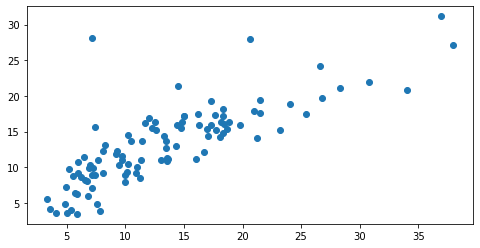

In [23]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test.values, y_pred)

Observations:
- y_pred and y_test are close

In [24]:
import statsmodels.api as sm

x_train_with_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_const)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
result = model.fit()

In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Median Home Value   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     63.42
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           5.86e-84
Time:                        13:33:03   Log-Likelihood:                -1146.2
No. Observations:                 404   AIC:                             2318.
Df Residuals:                     391   BIC:                             2370.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [27]:
x_test_with_const = sm.add_constant(x_test)
y_pred = result.predict(x_test_with_const)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


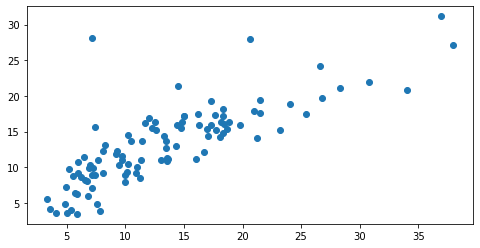

In [28]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test.values, y_pred)
plt.show()